In [1]:
import numpy as np
import pandas as pd
import os
import re
import warnings
from captum.attr import IntegratedGradients
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from scripts.churn_functions import simple_split, bake, modernize, out_eval

# Need to add get_importances() to all and snapshot_model() to all
## Should return an importance for every feature
And then rerun with correctly selected features

In [2]:
os.chdir('C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators')
data = pd.read_csv("data/out/features.csv")

In [3]:
os.getcwd()

'C:\\Users\\keato\\Documents\\LocalRStudio\\LJ_Leading_Indicators'

In [3]:
from models.dev.prediction.scripts.linear import linear_regression
from models.dev.prediction.scripts.tree import decision_tree
from models.dev.prediction.scripts.random import random_forest
from models.dev.prediction.scripts.arima import arima
from models.dev.prediction.scripts.gru import gru
from models.dev.prediction.scripts.lstm import lstm



from sklearn.metrics import r2_score, mean_squared_error
import torch
from torch.autograd import Variable 
from torch import nn

data = pd.read_csv("data/out/features.csv")

In [6]:
l = linear_regression()
t = decision_tree()
r = random_forest()
a = arima()

In [ ]:
l.fit(data = data, 
              split = 135,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

In [11]:
t.fit(data = data, 
              split = 135,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

In [5]:
# takes a little bit
r.fit(data = data, 
              split = 135,
              scoring = "neg_mean_squared_error",
              feature_selection = True)

In [266]:
a.fit(data = data, 
      split = 135,
      feature_selection = True,order=(12, 1, 0)
     )

In [252]:
# fits twice for feature_selection
g = gru()
g.fit(data =  data, split = 135, hidden_size= 16, verbose = 2, num_epochs= 300)
gimp = g.get_importances(10, names = True)
g.fit(data =  data, split = 135, hidden_size= 16, verbose = 2, num_epochs= 600, feature_selection=gimp)

Epoch: 0, train loss: 0.15289, test loss: 0.01364
Epoch: 30, train loss: 0.01081, test loss: 0.03899
Epoch: 60, train loss: 0.00847, test loss: 0.01971
Epoch: 90, train loss: 0.00773, test loss: 0.01522
Epoch: 120, train loss: 0.00707, test loss: 0.01299
Epoch: 150, train loss: 0.00639, test loss: 0.01129
Epoch: 180, train loss: 0.00561, test loss: 0.01011
Epoch: 210, train loss: 0.00486, test loss: 0.01021
Epoch: 240, train loss: 0.00409, test loss: 0.01043
Epoch: 270, train loss: 0.00336, test loss: 0.01022
Epoch: 0, train loss: 0.19636, test loss: 0.06271
Epoch: 60, train loss: 0.01391, test loss: 0.08356
Epoch: 120, train loss: 0.01065, test loss: 0.08188
Epoch: 180, train loss: 0.00958, test loss: 0.04430
Epoch: 240, train loss: 0.00918, test loss: 0.02754
Epoch: 300, train loss: 0.00884, test loss: 0.01750
Epoch: 360, train loss: 0.00855, test loss: 0.01217
Epoch: 420, train loss: 0.00830, test loss: 0.00992
Epoch: 480, train loss: 0.00812, test loss: 0.00888
Epoch: 540, train lo

In [253]:
m = lstm()
m.fit(data =  data, split = 135, hidden_size= 16, verbose = 2, num_epochs= 300)
mimp = m.get_importances(10, names = True)
# no feature selection

Epoch: 0, train loss: 0.86014, test loss: 0.38445
Epoch: 30, train loss: 0.02646, test loss: 0.03057
Epoch: 60, train loss: 0.01553, test loss: 0.01758
Epoch: 90, train loss: 0.01180, test loss: 0.02735
Epoch: 120, train loss: 0.01126, test loss: 0.02581
Epoch: 150, train loss: 0.00970, test loss: 0.02379
Epoch: 180, train loss: 0.00810, test loss: 0.02214
Epoch: 210, train loss: 0.00693, test loss: 0.01945
Epoch: 240, train loss: 0.00482, test loss: 0.01367
Epoch: 270, train loss: 0.00390, test loss: 0.01017


In [5]:
l.predict()
t.predict()
r.predict()
a.predict()
g.predict()
m.predict()

NameError: name 'l' is not defined

Train: 712.1666583405694 
Test: 1897.5579971795792


(712.1666583405694, 1897.5579971795792)

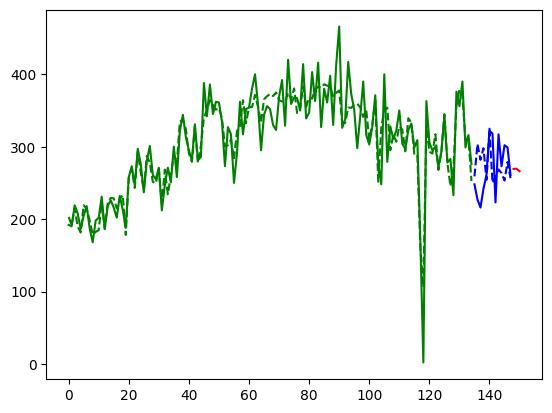

In [275]:
out_eval(m.full, criterion=mean_squared_error, verbose=2)

In [46]:
from scripts.churn_functions import out_eval
from sklearn.metrics import r2_score, mean_squared_error
import torch
from torch.autograd import Variable 
from torch import nn

For a model class, it needs to have 
    - fit method, which will take in most arguments and update model attribute
    - bake method, which will predict and return
    
    - need data attributes, cv attributes, features_in, targetvar, split, features_out, model itself, and out

In [8]:
r = random_forest()

r.fit(data = data, 
              split = 135,
              scoring = "neg_mean_squared_error",
              feature_selection = True)
r.predict()

In [23]:
r.get_importances().merge(r.__X_train__.columns.to_frame(), how = 'left', left_index=False, right_index=True, left_on = 'name')

,imp,name,0
8,0.321707,GT_lag3,GT_lag3
15,0.242295,prodmanuf_lag3,prodmanuf_lag3
7,0.101134,GT_lag9,GT_lag9
2,0.072823,g_car_for_sale_near_me_lag3,g_car_for_sale_near_me_lag3
13,0.061061,MZDAY_v_lag3,MZDAY_v_lag3
17,0.029958,treasurymat1_lag6,treasurymat1_lag6
1,0.020137,BWA_v_lag6,BWA_v_lag6
4,0.019596,g_how_to_buy_a_car_lag3,g_how_to_buy_a_car_lag3
14,0.019262,ngspot_lag3,ngspot_lag3
6,0.017556,g_used_cars_lag9,g_used_cars_lag9


In [15]:
r.__X_train__.columns.to_frame()

,0
BWA_lag9,BWA_lag9
BWA_v_lag6,BWA_v_lag6
g_car_for_sale_near_me_lag3,g_car_for_sale_near_me_lag3
g_how_to_buy_a_car_lag9,g_how_to_buy_a_car_lag9
g_how_to_buy_a_car_lag3,g_how_to_buy_a_car_lag3
g_new_cars_lag9,g_new_cars_lag9
g_used_cars_lag9,g_used_cars_lag9
GT_lag9,GT_lag9
GT_lag3,GT_lag3
GT_v_lag12,GT_v_lag12


In [232]:
l = lstm()

l.fit(data = data, split = 135, verbose = 2, num_epochs= 300, hidden_size=16, learning_rate=0.01, feature_selection = None)

Epoch: 0, train loss: 0.86014, test loss: 0.38445
Epoch: 30, train loss: 0.02646, test loss: 0.03057
Epoch: 60, train loss: 0.01553, test loss: 0.01758
Epoch: 90, train loss: 0.01180, test loss: 0.02735
Epoch: 120, train loss: 0.01126, test loss: 0.02581
Epoch: 150, train loss: 0.00970, test loss: 0.02379
Epoch: 180, train loss: 0.00810, test loss: 0.02214
Epoch: 210, train loss: 0.00693, test loss: 0.01945
Epoch: 240, train loss: 0.00482, test loss: 0.01367
Epoch: 270, train loss: 0.00390, test loss: 0.01017


In [233]:
l.predict()

Train: 712.1666583405694 
Test: 1897.5579971795792


(712.1666583405694, 1897.5579971795792)

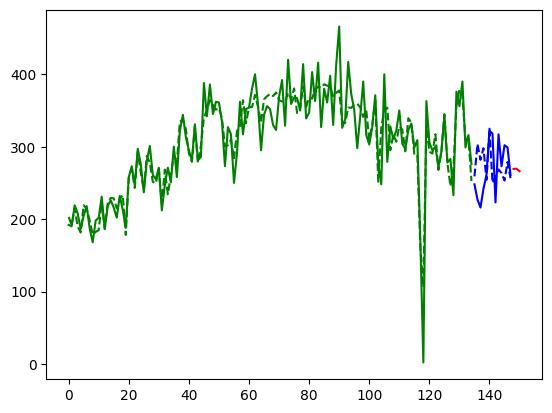

In [239]:
out_eval(l.full, criterion=mean_squared_error, verbose=2)

In [237]:
fs = l.get_importances(names = True)
fs

array(['stuffcpi_lag9', 'g_car_for_sale_near_me_lag3',
       'g_dealership_near_me_lag3', 'retail_lag3',
       'g_how_to_buy_a_car_lag3', 'carcpi_lag6', 'industry_lag9',
       'ngspot_lag3', 'stuffcpi_lag3', '10yinf_lag3', 'LEA_lag6',
       'g_how_to_buy_a_car_lag9', 'month', 'g_best_new_cars_lag12',
       'g_best_new_cars_lag9'], dtype=object)

In [215]:
l.predict()

Train: 0.04780576306322345 
Test: 3269.030577278458


(0.04780576306322345, 3269.030577278458)

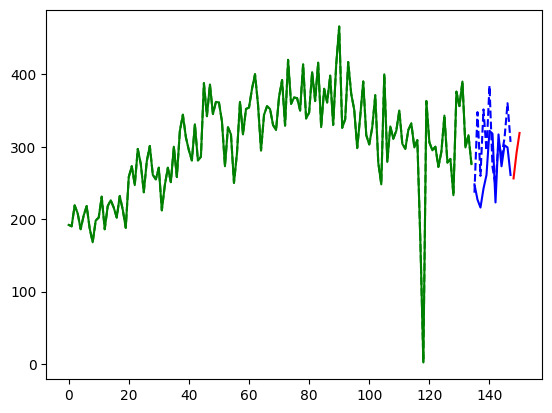

In [216]:
out_eval(l.full, criterion=mean_squared_error, verbose=2)

In [23]:
g.get_importances(10)

,imp,name
0,0.271761,stuffcpi_lag3
1,0.120152,ngspot_lag3
5,0.118044,AN_lag12
2,0.112457,sales_lag3
7,0.081934,localrent_lag9
9,0.060473,industrycg_lag9
8,0.053311,hcpiurban_lag9
6,0.034909,carcpi_lag9
3,0.010530,hcpiurban_lag12
4,0.005757,g_dealership_near_me_lag3


In [19]:
def expand_grid(splits, eval_scoring):
        aG, bG = np.meshgrid(list(splits), list(eval_scoring)) # create the actual grid
        aG = aG.flatten() # make the grid 1d
        bG = bG.flatten()
        return pd.DataFrame({
            'splits':aG, 
            'eval_scoring':bG})

expand_grid(splits = [(117, 119), (125, 130), (130, 135)], eval_scoring= [mean_squared_error, r2_score])

,splits,eval_scoring
0,117,<function mean_squared_error at 0x000002ADC461...
1,119,<function mean_squared_error at 0x000002ADC461...
2,125,<function mean_squared_error at 0x000002ADC461...
3,130,<function mean_squared_error at 0x000002ADC461...
4,130,<function mean_squared_error at 0x000002ADC461...
5,135,<function mean_squared_error at 0x000002ADC461...
6,117,<function r2_score at 0x000002ADC46196C0>
7,119,<function r2_score at 0x000002ADC46196C0>
8,125,<function r2_score at 0x000002ADC46196C0>
9,130,<function r2_score at 0x000002ADC46196C0>


In [20]:
def train_all(split, criterion):
    from models.dev.prediction.scripts.linear import linear_regression
    from models.dev.prediction.scripts.tree import decision_tree
    from models.dev.prediction.scripts.random import random_forest

    data = pd.read_csv("data/out/features.csv")
    
    # save results to df
    df = pd.DataFrame(columns = ['split',
                         'scoring_method', 
                         'train_score', 
                         'eval_score'])
    
    l = linear_regression()
    t = decision_tree()
    r = random_forest()
    
    l.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    t.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    # takes a little bit
    r.fit(data = data, 
                  split = split,
                  scoring = "neg_mean_squared_error",
                  feature_selection = True)

    l.predict()
    t.predict()
    r.predict()

    # compose df
    df.loc['lm'] = [split, criterion.__name__, out_eval(l.full, criterion)[0], out_eval(l.full, criterion)[1]]

    df.loc['tree'] = [split, criterion.__name__, out_eval(t.full, criterion)[0], out_eval(t.full, criterion)[1]]
    
    df.loc['rf'] = [split, criterion.__name__, out_eval(r.full, criterion)[0], out_eval(r.full, criterion)[1]]

    return df

In [33]:
train_all(split = 117, criterion=mean_squared_error)

,split,scoring_method,train_score,eval_score
lm,117,mean_squared_error,910.776837,6468.894566
tree,117,mean_squared_error,982.942894,6286.495117
rf,117,mean_squared_error,182.112869,5392.636877


In [21]:
full = pd.DataFrame(columns = ['model',
                               'split', 
                                'scoring_method',
                                      'train_score',
                                     'eval_score'])
for i in range(20, 135, 5):
    
    pdf = train_all(split = (i, 135),
                   criterion = mean_squared_error)
    
    pdf.reset_index(inplace=True)
    
    pdf = pdf.rename(columns = {'index':'model'})
    
    full = pd.concat([pdf, full], ignore_index = True)

C:\Users\keato\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+00, tolerance: 1.955e+00
  model = cd_fast.enet_coordinate_descent(


In [24]:
full # model and criterion cols empty
#try again?
# takes like an hour
full.to_csv("fully.csv")